# **PROJETO Wine-Chem**

---
**Objetivo:** Este projeto apresenta um análise de agrupamento (clustering) aplicada ao Wine Dataset, disponível publicamente no Kaggle. O objetivo é identificar padrões e similaridades entre diferentes vinhos com base em seus componentes quimícos, utilizando técnicas de aprendizado não supervisionado.

**Resumo de projeto:** Ao longo do notebook são explorados métodos de pré-processamento, redução de dimensionalidade e algortimos de clustering, com foco em avaliar como diferentes abordagens se comportam diante de um conjunto de dados real. O projeto serve tanto como demonstração  prática de habilidades em Machine Learning quanto como base para estudos de segmentação de dados e análise exploratória.

**Fonte de dados**: wine-clustering - kaggle (https://www.kaggle.com/datasets/harrywang/wine-dataset-for-clustering)

---

## **Como navegar neste notebook**
1. **Introdução & resumo do dataset** -> visão geral e dicionário de variáveis.
2. **EDA** -> Distribuição, outliers, testes de normalidade
3. **Pré-processamento** ->
4. **Modelagem** -> k-means, PCA, agrupamento hierarquico
5. **Conclusões e recomendações**

## **Dicionário de variáveis**
- Alcohol (float):
- Malic_Acid (float):
- Ash (float):
- Ash_Alcanity (float):
- Magnesium (int):
- Total_Phenols (float):
- Flavanoids (float):
- Nonflavanoid_Phenols (float):
- Proanthocyanins (float):
- Color_Intensity (float):
- Hue (float):
- OD280 (float):
- Pronline (int)

## **BIBLIOTECAS UTILIZADAS**

In [1]:
#analise e manipulação de dados
import pandas as pd
import numpy as np

#bibliotecas graficas
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import scipy.stats as sts

#pre-processamento
from sklearn.compose import ColumnTransformer
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
# estatistica
from statsmodels.stats.diagnostic import lilliefors
from statistics import mode
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#bibliotecas para verificar o agrupamento realizado pelo algortimo:
from scipy.cluster.hierarchy import dendrogram, linkage

#algortimo
from sklearn.cluster import KMeans, MeanShift
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
#!pip install kmodes
from kmodes.kprototypes import KPrototypes
from kmodes.kmodes import KModes

## **CARREGAMENTO E RESUMO RAPIDO DO DATASET**

Nesta etapa são carregados os dados originais do Wine Dataset e realizada uma exploração inicial para verificar sua estrutura. O objetivo é compreender o formato do conjunto de dados, confirmar a presença de 13 variáveis químicas e garantir que não existam valores ausentes ou inconsistências. Esssa inspeção é essencial para orientar as próximas decisões de pré-processamento e modelagem.

In [2]:
#dataset
vinhos = pd.read_csv('../data/raw/wine-clustering.csv', sep = ',', encoding= 'utf-8')
vinhos.head(10)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
6,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
7,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
8,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
9,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045


In [7]:
# CORPO DO DATASET
vinhos.shape

(178, 13)

## **EDA**
Nesta etapa foi realizado uma visualização inicial do dataset, incluindo:
- Estatística descritiva (média, desvio padrão, quartis, valores mínimo e máximo, contagem)
- Identificação dos tipos de dados (int, float, str)
- Verificação de valores ausentes e análise da moda e cada variável
  
Em seguida, conduziu-se uma análise estatístiica mais detalhada para compreender o comportamento das variáveis. Foram utilizados:
- Boxplot para identificar outliers
- Histplots e Q-Q Plots, para observar a distribuição e indícios de normalidade
- Teste estatísticos de normalidade (shapiro-wilk, klomogorv smirnov) para confirmar as observações gráficas.

### **OVERVIEW INICIAL**

Nesta etapa, apresento uma visão geral do comportamento das variáveis

Os objetos são:
- Entender faixas de valores e possíveis assimetrias
- Identificar valores extremos antes dos testes de normalidade

In [13]:
# VALORES NULOS EM CADA VARIÁVEL
vinhos.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [16]:
# TIPOS DE CADA VARIÁVEL PRESENTE NO DATASET
vinhos.dtypes

Alcohol                 float64
Malic_Acid              float64
Ash                     float64
Ash_Alcanity            float64
Magnesium                 int64
Total_Phenols           float64
Flavanoids              float64
Nonflavanoid_Phenols    float64
Proanthocyanins         float64
Color_Intensity         float64
Hue                     float64
OD280                   float64
Proline                   int64
dtype: object

In [17]:
# ESTATÍSTICA GERAL DE CADA VARIÁVEL
vinhos.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


### **DISTRIBUIÇÃO UNIVARIADAS**
A seguir, visualizo a distribuição das variaveis numérica com histogramas + KDE, para entender:
- Assimétria
- Caudas Longas
- Concentrações
- Possíveis transformações a serem aplicadas futuramente

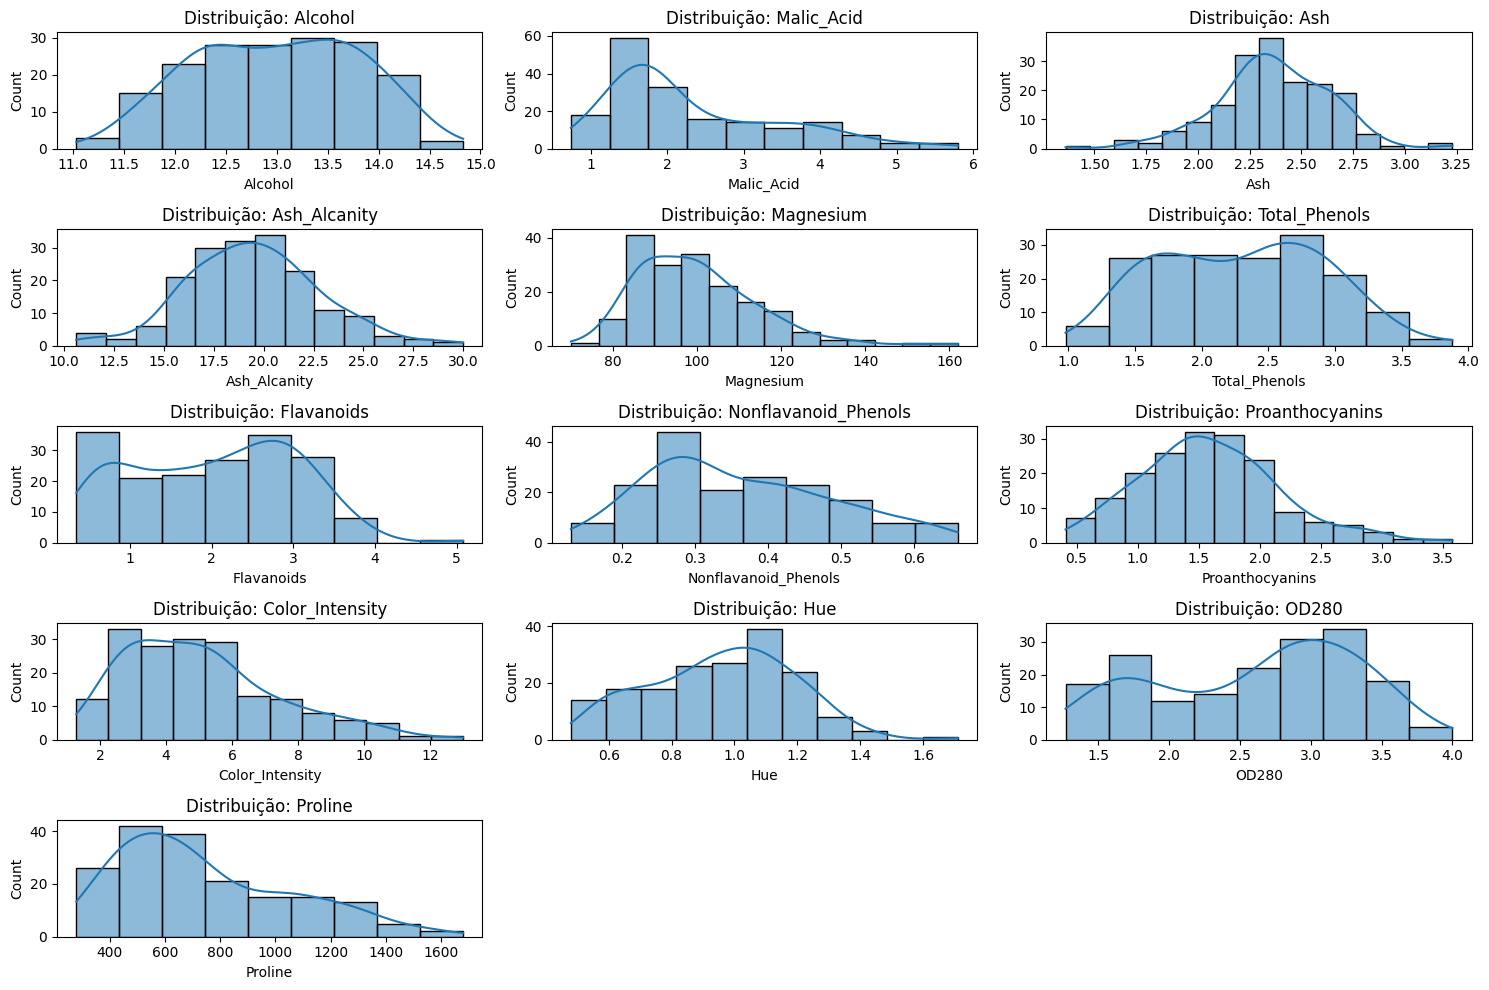

In [31]:
# COLUNAS PRESENTE NO DATASET
numero_colunas = ['Alcohol', 'Malic_Acid','Ash','Ash_Alcanity','Magnesium','Total_Phenols','Flavanoids','Nonflavanoid_Phenols','Proanthocyanins','Color_Intensity',
                 'Hue','OD280','Proline']

# TAMANNHO DA FIGURA
plt.figure(figsize = (15,10))

# FOR RODA CADA VARIAVEL E PLOTA O GRÁFICO COM AS CONFIGURAÇÕES ESTABELECIDAS
for i,coluna in enumerate(numero_colunas,1):
    plt.subplot(5,3,i)
    sns.histplot(vinhos[coluna], kde = True)
    plt.title(f'Distribuição: {coluna}')

plt.tight_layout()
plt.show()
    

### **OUTLIERS (BOXPLOTS)**

Nesta etapa, são avaliados possíveis outliers presentes nas variáveis numéricas do dataset. A identificação de valores extremos é fundamental, especialmente em algoritmos baseados em distância, como K-Means, que podem ser sensíveis a pontos muito distantes da distribuição central.

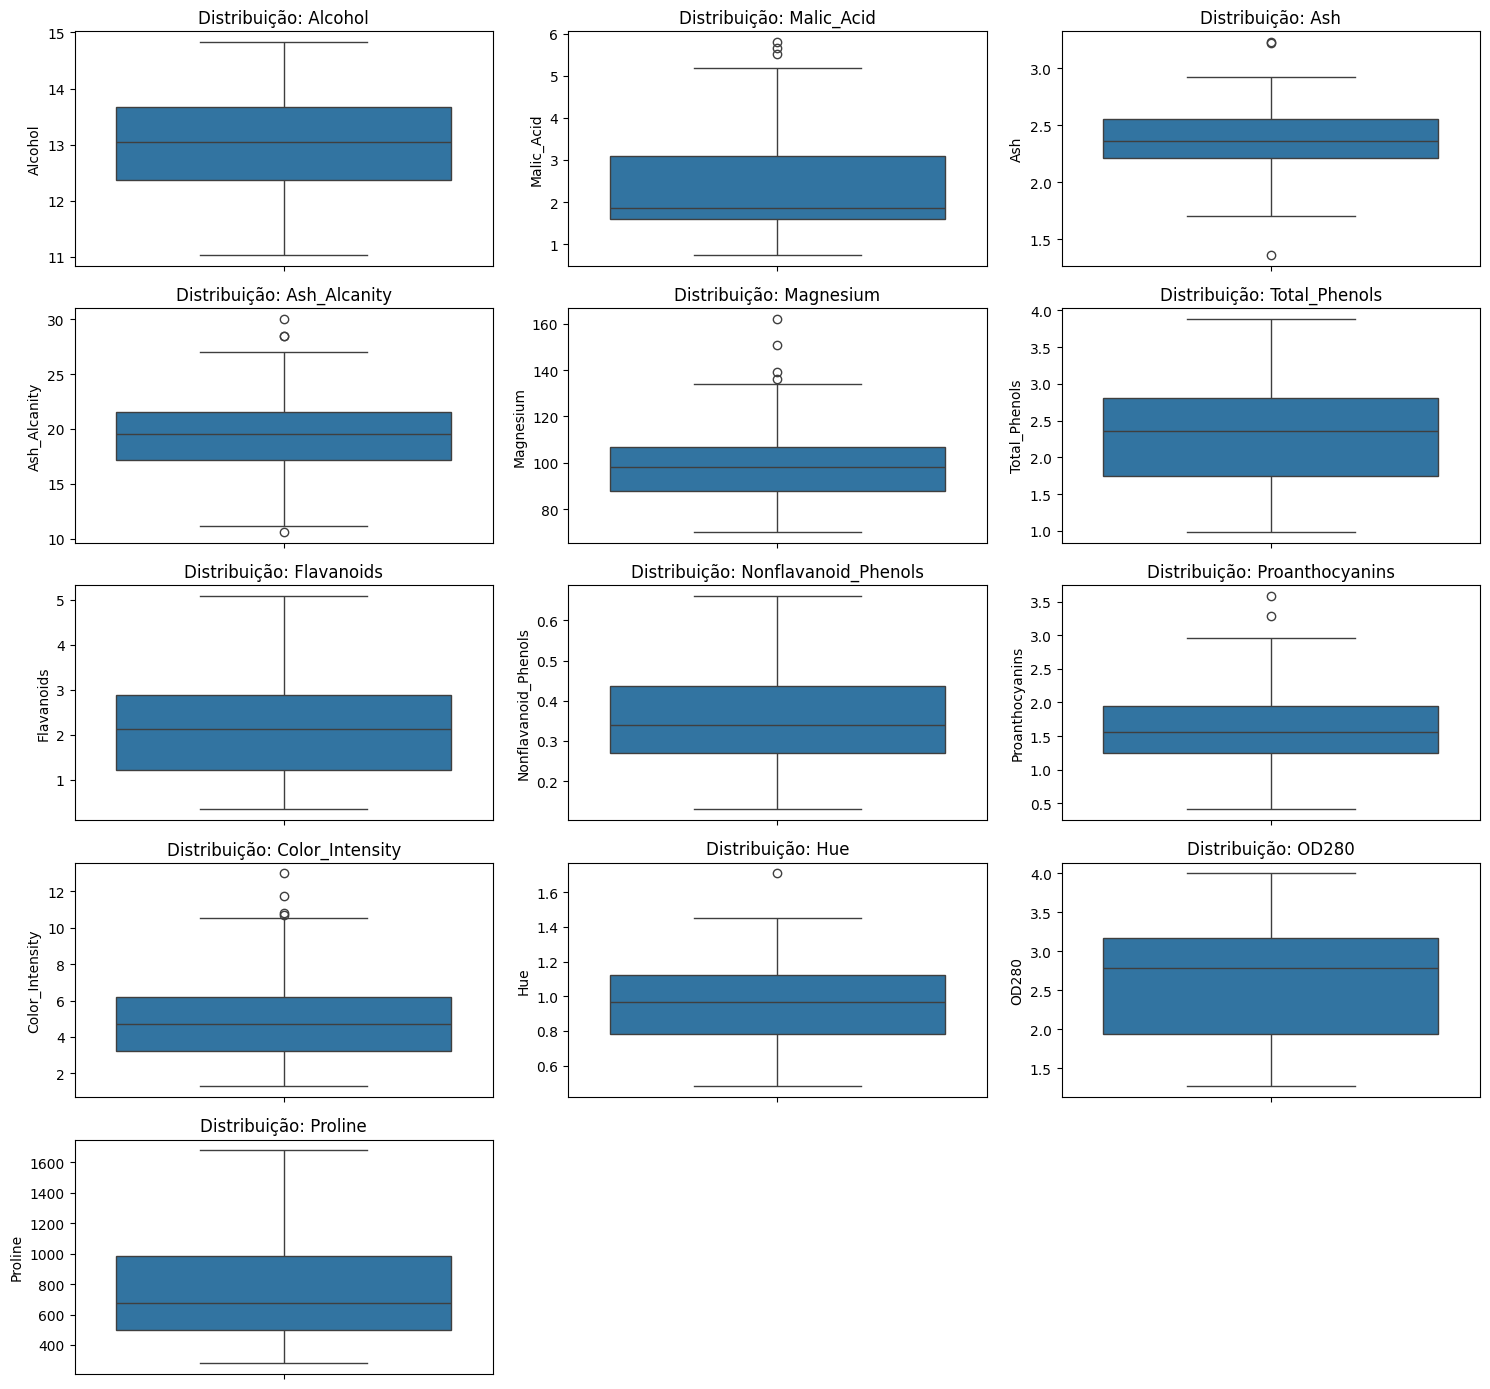

In [36]:
# COLUNAS PRESENTE NO DATASET
numero_colunas = ['Alcohol', 'Malic_Acid','Ash','Ash_Alcanity','Magnesium','Total_Phenols','Flavanoids','Nonflavanoid_Phenols','Proanthocyanins','Color_Intensity',
                 'Hue','OD280','Proline']

# TAMANNHO DA FIGURA
plt.figure(figsize = (15,14))

# FOR RODA CADA VARIAVEL E PLOTA O GRÁFICO COM AS CONFIGURAÇÕES ESTABELECIDAS
for i,coluna in enumerate(numero_colunas,1):
    plt.subplot(5,3,i)
    sns.boxplot(y = vinhos[coluna])
    plt.title(f'Distribuição: {coluna}')

plt.tight_layout()
plt.show()
    

### **NORMALIDADE: (HISTPLOT + KDE + QQ-PLOT)**
Nesta Etapa se as variáveis seguem distribuição normal. Utilizo:
- Histograma + KDE para observar comportamento
- Gráfico Q-Q (Quantile-Quantile plot) para verificar aderência à normalidade
- Teste estatístico Shapiro-wilk e klomogorv smirnov

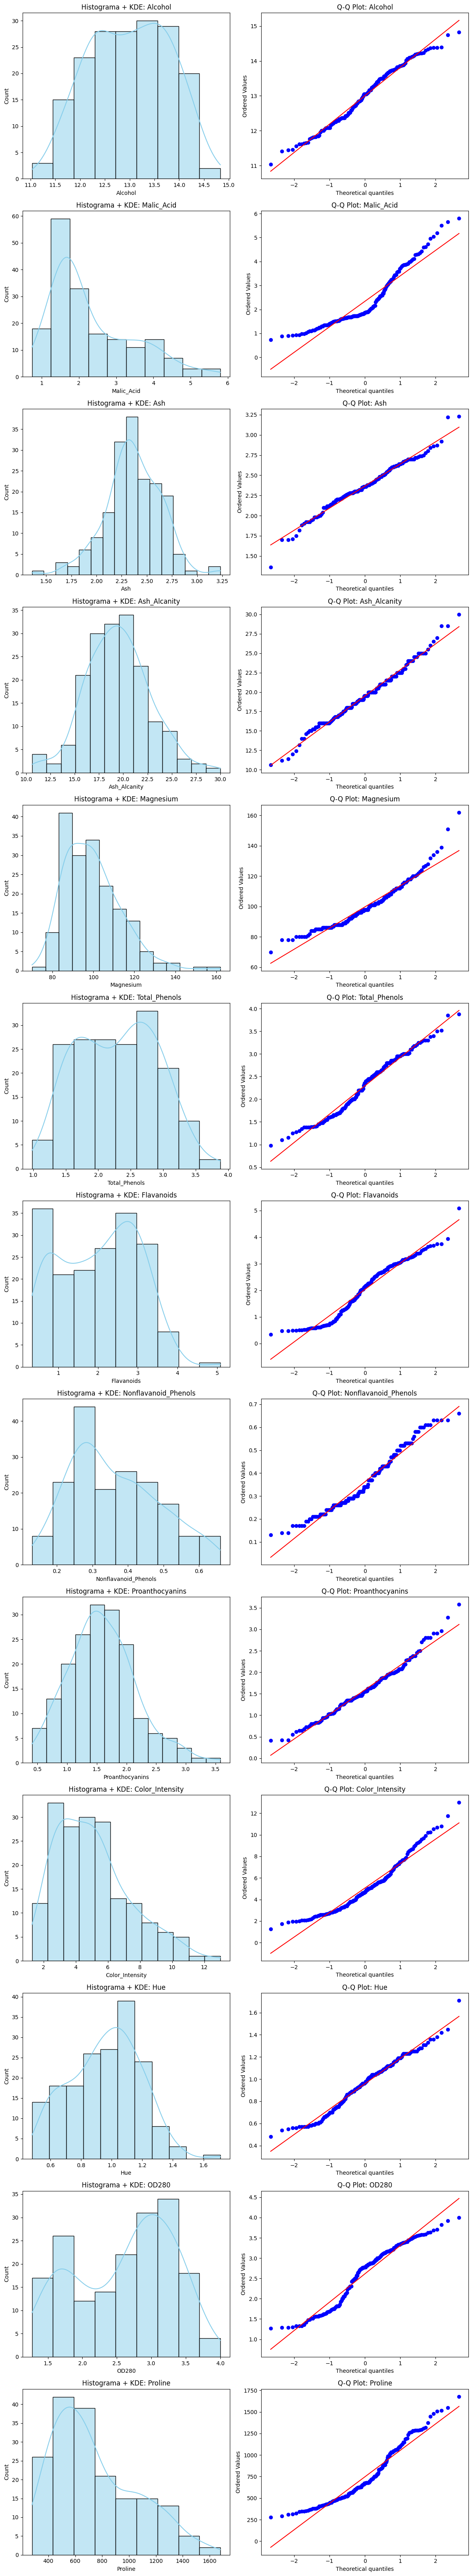

In [39]:
# Seleciona apenas colunas numéricas
numeric_cols = vinhos.select_dtypes(include=['int64', 'float64']).columns

# Define tamanho da figura e grade de subplots
numero_cols = 2  # 2 gráficos por linha: hist + qq
numero_rows = len(numero_colunas)  # 1 linha por variável
plt.figure(figsize=(12, 5 * numero_rows))

for i, colunas in enumerate(numeric_cols):
    # Histograma com KDE
    plt.subplot(numero_rows, 2, 2*i + 1)
    sns.histplot(vinhos[colunas], kde=True, color='skyblue')
    plt.title(f'Histograma + KDE: {colunas}')
    
    # Q-Q plot
    plt.subplot(numero_rows, 2, 2*i + 2)
    sts.probplot(vinhos[colunas], dist="norm", plot=plt)
    plt.title(f'Q-Q Plot: {colunas}')

plt.tight_layout()
plt.show()

**TESTES DE NORMALIDADE**

Aplicando testes estatisticos de normalidade para cada variável, utilizei o lilliefors, pois é o mais indicado para menor quantidade de dados.
- O primeiro valor da tupla é a estatística do teste
- O segundo valor é: p_valor

In [3]:
# COLUNAS PRESENTE NO DATASET
numero_colunas = ['Alcohol', 'Malic_Acid','Ash','Ash_Alcanity','Magnesium','Total_Phenols','Flavanoids','Nonflavanoid_Phenols','Proanthocyanins','Color_Intensity',
                 'Hue','OD280','Proline']

# FOR RODA CADA VARIAVEL E PRINTA O TESTE ESTATISTICO
for coluna in numero_colunas:
    print('Estatistica de {} é: {}'.format(coluna, lilliefors(vinhos[coluna])))


Estatistica de Alcohol é (np.float64(0.06792401058724745), np.float64(0.05838225305113938))
Estatistica de Malic_Acid é (np.float64(0.19127641812672302), np.float64(0.0009999999999998899))
Estatistica de Ash é (np.float64(0.05845435626074311), np.float64(0.18650410337626436))
Estatistica de Ash_Alcanity é (np.float64(0.06349100089114879), np.float64(0.09886250242779672))
Estatistica de Magnesium é (np.float64(0.08954340677879147), np.float64(0.0024939418473668225))
Estatistica de Total_Phenols é (np.float64(0.07207477778676175), np.float64(0.035085821747413856))
Estatistica de Flavanoids é (np.float64(0.08534747079659089), np.float64(0.004657390955667288))
Estatistica de Nonflavanoid_Phenols é (np.float64(0.1148245732192627), np.float64(0.0009999999999998899))
Estatistica de Proanthocyanins é (np.float64(0.05674136210862185), np.float64(0.216577786646921))
Estatistica de Color_Intensity é (np.float64(0.09054212154353314), np.float64(0.0021822260171554214))
Estatistica de Hue é (np.floa

### **ANÁLISE DE CORRELAÇÃO ENTRE AS VARIÁVEIS**
Como etapa complementar da análise exploratória, é importante examinar a relação entre as variáveis químicas do dataset. A matriz de correlação permite identificar atributos fortemente relacionados, redundâncias e possíveis agrupamentos naturais entre as características. Essa análise é especialmente relevante em problemas de clustering, nos quais variáveis altamente correlacionadas podem influencias a distância entre observações e, consequentemente, o comportamento dos algortimos.

A partir da matriz de correlação, é possível avaliar se será necessário aplicara redução de dimensionalidade (PCA) ou normalizações especificas, além de compreender como os componentes químicos se associam entre si.

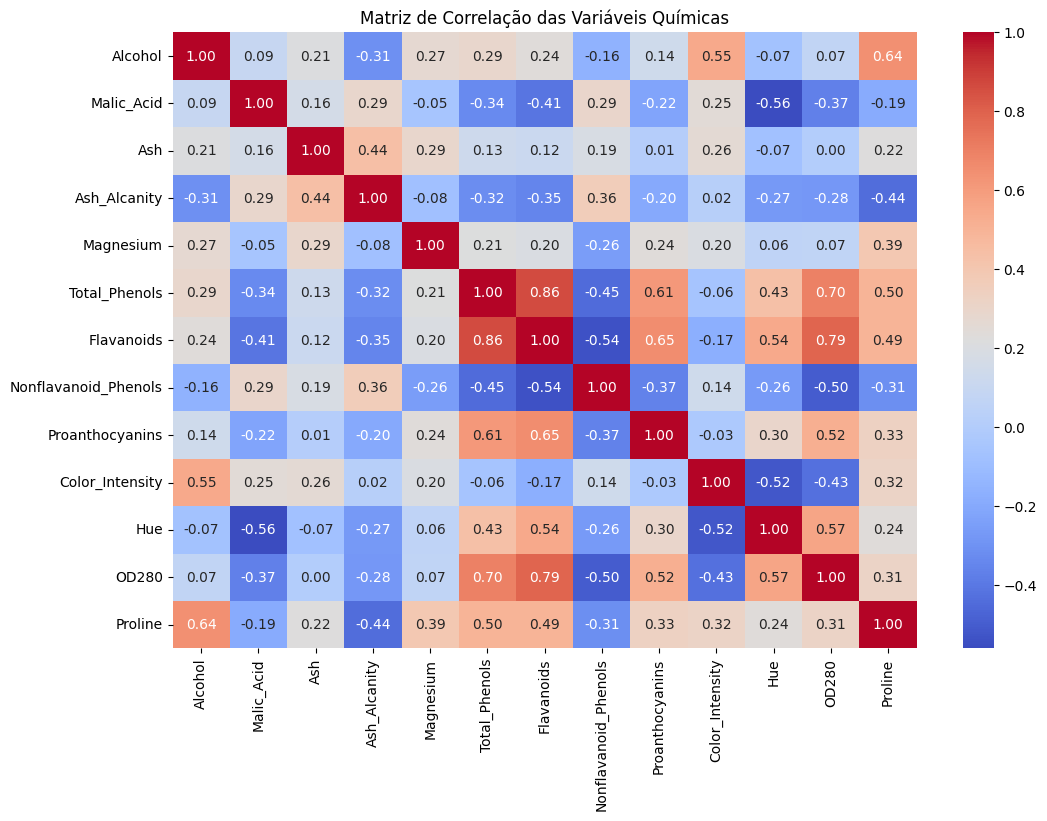

In [4]:
# CRIA A MATRIZ DE CORRELAÇÃO, BUSCANDO MULTICOLINEARIDADE ENTRE AS VARIAVEISescreva a
plt.figure(figsize=(12, 8))
sns.heatmap(vinhos.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Matriz de Correlação das Variáveis Químicas")
plt.show()


### **CONCLUSÃO DA ANÁLISE EXPLORATÓRIA (EDA)**
A análise explorátoria permitiu compreender melhor o comportamente das variáveis químicas presentes no conjunto de dados dos vinhos e identificar padrões importantes antes da etapa de modelagem.

No geral, observou-se que:
- As variáveis apresentam distribuição distintas, algumas mais concentradas como, total sulfur dioxide, outras mais dispersas (alcohol e volatile acidity), o que indica diferentes escalas e amplitudes, reforçando a necessidade de normalização antes do clustering.
- A matriz de correlação revelou que apenas algumas variáveis possuem correlação forte entre si, enquanto a maior parte apresenta correlação fraca ou moderada. Isso indica baixa multicolinearidade geral no dataset, sugerindo que as variáveis carregam informações complementares.
- Nas poucas variáveis com correlação muito elevada, foi identificado um posssível risco de redundância, que poderá ser tratado por meio da remoção de uma das features correlacionadas ou redução de dimensionalidade via PCA, dependendo da estratégia adotada durante a modelagem.
- Não foram observados valores faltantes, e a presença de outliers, quando existente é esperada em dados reais e será considerada no processo de padronização das variáveis
  
Em síntese, a EDA indica que o conjunto de dados está em boa condição para prosseguir para as etapas de pré-processamento, padronização ou normalização, e posteriormente, aplicação de algortimos de clustering, uma vez que as variáveis oferecem diversidade informacional e potencial para separar vinhos em grupos distintos com base em suas caractéristicas químicas.

## **ELBOW METHOD PARA DESCOBRIR A QUANTIDADE DE CLUSTER PARA O KMEANS PARA TODOS OS ATRIBUTOS**

In [ ]:
#criando o escalonador
escalonador = StandardScaler()
#escalona os dados do dataset copiado
vinhos_copia2 = escalonador.fit_transform(vinhos_copia)
#array com os dados escalonados
vinhos_copia2

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [ ]:
#criando o wcss para aplicar num grafico de linha e ver a quantidade de clusters recomendada pelo elbow
wcss = []
for i  in range(1,11):
  kmeans = KMeans(n_clusters= i, init ='k-means++', random_state = 5, max_iter= 300)
  kmeans.fit(vinhos_copia2)
  #inertia: Método para gerar o wcss
  wcss.append(kmeans.inertia_)
print(len(wcss))


10


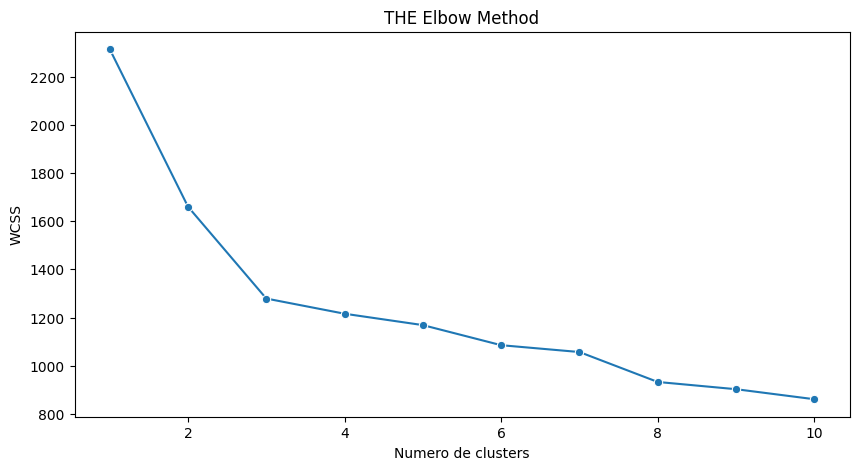

In [ ]:
#plotoado o grafico
plt.figure(figsize = (10, 5))
sns.lineplot(x = range(1,11), y = wcss, marker='o')
plt.title("THE Elbow Method")
plt.xlabel("Numero de clusters")
plt.ylabel("WCSS");

**ELBOW METHOD UTILIZANDO O PCA (REDUÇÃO DE DIMENSIONALIADADE) PARA O KMEANS**

In [ ]:
#definindo a quantidade de componentes do PCA
pca = PCA(n_components=2)
#cria a redução de dimensionalidade com o array escalonado
vinhos_copia_PCA = pca.fit_transform(vinhos_copia2)
#array com a redução e escalonamento aplicado
vinhos_copia_PCA

array([[ 3.31675081,  1.44346263],
       [ 2.20946492, -0.33339289],
       [ 2.51674015,  1.0311513 ],
       [ 3.75706561,  2.75637191],
       [ 1.00890849,  0.86983082],
       [ 3.05025392,  2.12240111],
       [ 2.44908967,  1.17485013],
       [ 2.05943687,  1.60896307],
       [ 2.5108743 ,  0.91807096],
       [ 2.75362819,  0.78943767],
       [ 3.47973668,  1.30233324],
       [ 1.7547529 ,  0.61197723],
       [ 2.11346234,  0.67570634],
       [ 3.45815682,  1.13062988],
       [ 4.31278391,  2.09597558],
       [ 2.3051882 ,  1.66255173],
       [ 2.17195527,  2.32730534],
       [ 1.89897118,  1.63136888],
       [ 3.54198508,  2.51834367],
       [ 2.0845222 ,  1.06113799],
       [ 3.12440254,  0.78689711],
       [ 1.08657007,  0.24174355],
       [ 2.53522408, -0.09184062],
       [ 1.64498834, -0.51627893],
       [ 1.76157587, -0.31714893],
       [ 0.9900791 ,  0.94066734],
       [ 1.77527763,  0.68617513],
       [ 1.23542396, -0.08980704],
       [ 2.18840633,

In [ ]:
#valor da explicação das variaveis pós aplicação do PCA e escalonamento
pca.explained_variance_ratio_.sum()

np.float64(0.5540633835693527)

In [ ]:
#criando o wcss para aplicar num grafico de linha e ver a quantidade de clusters recomendada pelo elbow
wcss = []
for i  in range(1,11):
  kmeans = KMeans(n_clusters= i, init ='k-means++', random_state = 5, max_iter= 300)
  kmeans.fit(vinhos_copia_PCA)
  #inertia: Método para gerar o wcss
  wcss.append(kmeans.inertia_)
print(len(wcss))


10


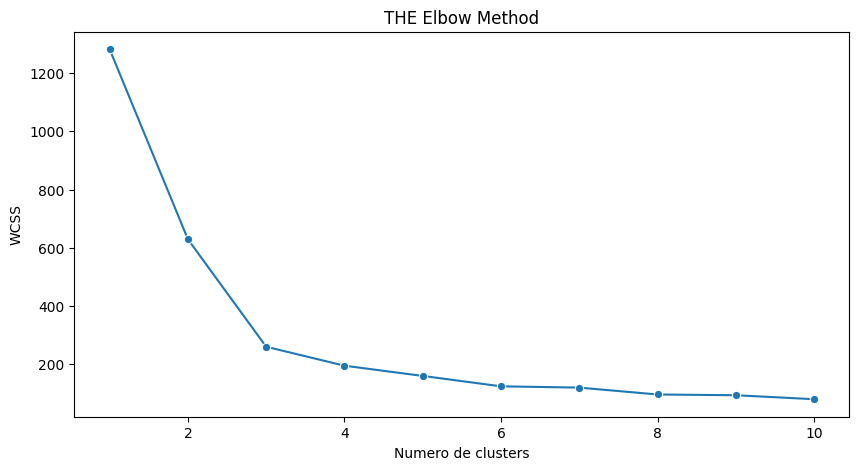

In [ ]:
#plotoado o grafico
plt.figure(figsize = (10, 5))
sns.lineplot(x = range(1,11), y = wcss, marker='o')
plt.title("THE Elbow Method")
plt.xlabel("Numero de clusters")
plt.ylabel("WCSS");

**RÓTULOS**:

vinhos_copia2: escalona(padroniza) os dados do dataset copiado

vinhos_copia_PCA: aplica a redução de dimensionalidade nos dados escalonados

**AGRUPAMENTO HIERARQUICO DENDROGRAMA TODOS OS ATRIBUTOS**

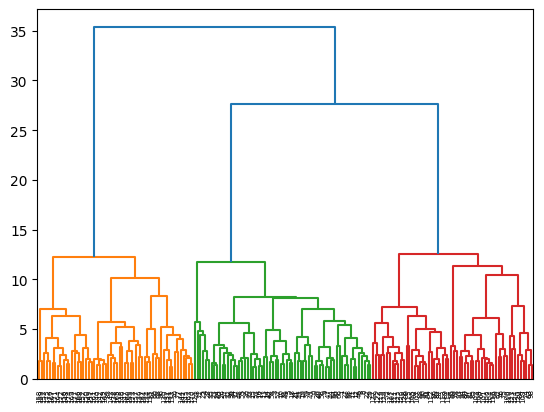

In [ ]:
#dendograma para definir a quantidade de cluster que será utilizado no agrupamento hierarquico com todos os atributos
dendograma = dendrogram(linkage(vinhos_copia2, method = 'ward'))

**AGRUPAMENTO HIERARQUICO DENDOGRAMA COM PCA**

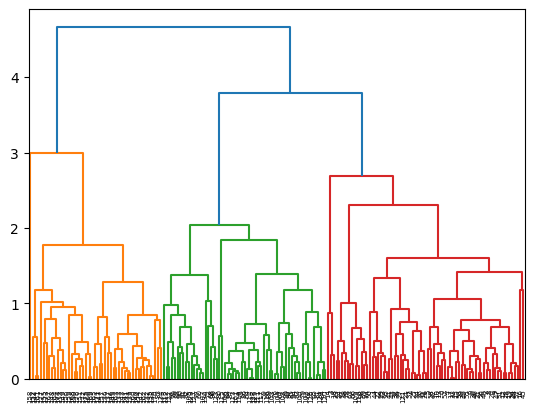

In [ ]:
#dendograma para definir a quantidade de cluster que será utilizado no agrupamento hierarquico com PCA
dendograma = dendrogram(linkage(vinhos_copia_PCA, method = 'average'))

**PIPELINES UTILIZADO PARA APLICAR O PRE-PROCESSAMENTO E O ALGORTIMO**

In [ ]:
#pipeline sem PCA
pipeline_vinho = Pipeline(
    steps = [('scalonar', StandardScaler()),
             ('kmeans', KMeans(n_clusters= 4, init = 'k-means++',max_iter = 300,random_state = 35))]
)
#pipeline com PCA
pipeline_vinho_pca = Pipeline(
    steps= [('scalonar', StandardScaler()),
            ('pca',PCA(n_components= 2)),
            ('kmeans', KMeans(n_clusters= 5, init = 'k-means++',max_iter=300,random_state=35))]
)
#pipeline para agrupamento hierarquico
pipeline_vinho_hierarquico = Pipeline(
    steps = [('scalonar', StandardScaler()),
             ('hier',AgglomerativeClustering(n_clusters=3,metric= 'euclidean',linkage='ward'))]
)
#pipele para agrupamento hierarquico com PCAs
pipeline_vinho_hierarquico_pca = Pipeline(
    steps = [('scalonar', StandardScaler()),
             ('pca', PCA(n_components= 2)),
             ('hier', AgglomerativeClustering(n_clusters=3,metric = 'euclidean', linkage= 'complete'))]
)
#pipeline para o DBSCAN
pipeline_vinho_DBSCAN = Pipeline(
    steps = [
        ('scalonar', StandardScaler()),
        ('DBS', DBSCAN(eps = 0.75,min_samples= 5))
    ])
#pipeline para DBSCAN com PCA
pipeline_vinho_DBSCAN_pca = Pipeline(
    steps = [
        ('scalonar', StandardScaler()),
        ('pca', PCA(n_components= 2)),
        ('DBS', DBSCAN(eps = 0.53, min_samples= 4))
    ]
)
#pipeline para meanshift
pipeline_vinho_meanshift = Pipeline(
    steps = [
        ('scalonar', StandardScaler()),
        ('mean', MeanShift(bandwidth = 3.7, cluster_all= True))
    ]
)
#pipeline para meanshift com PCA
pipeline_vinho_meanshift_pca = Pipeline(
    steps = [
    ('scalonar',StandardScaler()),
    ('pca',PCA(n_components=2)),
    ('mean', MeanShift(bandwidth= 1.3, cluster_all= True))
])


#**KMEANS COM TODOS OS ATRIBUTOS**

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [ ]:
#Escalona os dados e cria o pipeline já com os cluster e definição dos hiperparametros
pipeline_vinho.fit(vinhos_copia)

Pipeline(steps=[('scalonar', StandardScaler()),
                ('kmeans', KMeans(n_clusters=4, random_state=35))])

In [ ]:
#centroids das variaveis
centroids = pipeline_vinho.named_steps['kmeans'].cluster_centers_
centroids

array([[-0.97536221, -0.27371522, -0.37816559,  0.33857288, -0.45615326,
         0.26518569,  0.29721075, -0.30271742,  0.35277517, -0.88302898,
         0.3756079 ,  0.54443663, -0.77914616],
       [-0.69981104, -0.579387  , -0.63692168, -0.28648231, -0.40313502,
        -0.8727224 , -0.59936506,  0.71758919, -0.8027552 , -0.72333522,
         0.36736231, -0.57120976, -0.67057501],
       [ 0.8878039 , -0.33424336,  0.32891908, -0.66561486,  0.57048997,
         0.88190348,  0.94931446, -0.5897288 ,  0.58946147,  0.17500777,
         0.50184089,  0.77069651,  1.18120327],
       [ 0.21107143,  0.98325875,  0.27249461,  0.63083897, -0.06401953,
        -0.99379606, -1.24119496,  0.73255147, -0.74453314,  1.03577294,
        -1.20419599, -1.28409725, -0.38173158]])

In [ ]:
#inverto o escalonamento das variaveis
centroids_real = pipeline_vinho.named_steps['scalonar'].inverse_transform(
    pipeline_vinho.named_steps['kmeans'].cluster_centers_
)
centroids_real

array([[1.22110204e+01, 2.03142857e+00, 2.26306122e+00, 2.06224490e+01,
        9.32448980e+01, 2.46061224e+00, 2.32530612e+00, 3.24285714e-01,
        1.79224490e+00, 3.01673469e+00, 1.04306122e+00, 2.99714286e+00,
        5.02224490e+02],
       [1.24340909e+01, 1.69090909e+00, 2.19227273e+00, 1.85409091e+01,
        9.40000000e+01, 1.75045455e+00, 1.43227273e+00, 4.50909091e-01,
        1.13272727e+00, 3.38590909e+00, 1.04118182e+00, 2.20727273e+00,
        5.36318182e+02],
       [1.37193333e+01, 1.96400000e+00, 2.45650000e+00, 1.72783333e+01,
        1.07866667e+02, 2.84550000e+00, 2.97483333e+00, 2.88666667e-01,
        1.92733333e+00, 5.46266667e+00, 1.07183333e+00, 3.15733333e+00,
        1.11781667e+03],
       [1.31714894e+01, 3.43170213e+00, 2.44106383e+00, 2.15957447e+01,
        9.88297872e+01, 1.67489362e+00, 7.92978723e-01, 4.52765957e-01,
        1.16595745e+00, 7.45255317e+00, 6.82978723e-01, 1.70255319e+00,
        6.27021277e+02]])

In [ ]:
#variaveis agrupadas
classificacao = pipeline_vinho.named_steps['kmeans'].labels_
#capturando a quantidade de cada grupo e para cada valor
valores, contagens = np.unique(classificacao, return_counts= True)
#resultado da classificação
print(classificacao)
#cada grupo
print(valores)
#contagem de cada grupo
print(contagens)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 0 1 0 0 0 1 0 1 0 0 2
 0 1 1 1 0 0 0 0 0 3 0 0 1 0 1 0 1 1 1 0 0 2 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0
 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
[0 1 2 3]
[49 22 60 47]


In [ ]:
#grafico para analisar os agrupamentos - fica muito confuso a vizualização
graf1 = px.scatter(x = vinhos_copia.values[:, 0], y = vinhos_copia.values[:,1], color = classificacao)
graf2 = px.scatter(x = centroids_real[:,0], y = centroids_real[:,1], size = [15,15,15,15])
graf3 = go.Figure(data = graf1.data + graf2.data)
graf3.update_layout(width = 800, height = 500, title_text = 'Agrupamento K-Means')
graf3.update_xaxes(title = "")
graf3.update_yaxes(title = '')
graf3.show()

**Agrupando**

In [ ]:
agrupamento = pd.DataFrame(classificacao, columns=['Agrupamento'])
agrupamento

,Agrupamento
0,2
1,2
2,2
3,2
4,2
...,...
173,3
174,3
175,3
176,3


In [ ]:
#agrupa o dataset copiado com os agrupamentos criados pelo KMeans com todos os atributos
vinhos_KM = pd.concat([vinhos_copia,agrupamento], axis = 1)
vinhos_KM

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Agrupamento
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,2
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,2
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,2
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,3
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,3
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,3
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,3


#**KMEAS COM PCA**

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [ ]:
#exibição do pipeline
pipeline_vinho_pca

Pipeline(steps=[('scalonar', StandardScaler()), ('pca', PCA(n_components=2)),
                ('kmeans', KMeans(n_clusters=5, random_state=35))])

In [ ]:
#treinando o modelo com os dados
pipeline_vinho_pca.fit_transform(vinhos_copia)

array([[3.44838206, 5.23133736, 0.93521895, 5.91284865, 6.26379033],
       [1.3801717 , 3.34646299, 1.46438164, 5.39195642, 5.16212309],
       [2.6615783 , 4.34968667, 0.11032952, 5.19805967, 5.42001144],
       [4.77894318, 6.43016179, 2.10518888, 6.3275787 , 7.0006728 ],
       [2.16993767, 3.20441006, 1.45356533, 3.79860333, 3.90377832],
       [3.87494017, 5.48200127, 1.1789725 , 5.59749972, 6.14045192],
       [2.75685784, 4.39290209, 0.06284744, 5.1011836 , 5.36802704],
       [3.01977511, 4.43234621, 0.62690229, 4.64469066, 5.05601002],
       [2.56057117, 4.27331762, 0.20613639, 5.21911359, 5.40486789],
       [2.58709695, 4.38880484, 0.44872609, 5.48649579, 5.63963167],
       [3.44257724, 5.27777671, 1.05488539, 6.09385184, 6.40652559],
       [1.97740922, 3.50057815, 0.85020687, 4.5875274 , 4.63549885],
       [2.16163211, 3.8123061 , 0.54652834, 4.90517445, 4.99561353],
       [3.30048555, 5.16200844, 1.01622826, 6.10045149, 6.3666054 ],
       [4.58954125, 6.41895899, 2.

In [ ]:
#variancia do PCA
variancia = pipeline_vinho_pca.named_steps['pca'].explained_variance_ratio_.sum()
variancia

np.float64(0.5540633835693527)

In [ ]:
#obtem os centroides escalonados e com aplicação do PCA
centroids_pca = pipeline_vinho_pca.named_steps['kmeans'].cluster_centers_
centroids_pca

array([[ 1.21488655, -1.29030865],
       [-0.81557167, -1.76446528],
       [ 2.4420922 ,  1.11239345],
       [-2.54660835,  2.20687505],
       [-2.88001359,  0.52958064]])

In [ ]:
#inverte a aplicação do PC para 2 compnentes
centroids_escalonado = pipeline_vinho_pca.named_steps['pca'].inverse_transform(centroids_pca)
centroids_escalonado

array([[-0.44871593, -0.58810542, -0.41031813, -0.27708212, -0.21411612,
         0.39554711,  0.51815238, -0.39981827,  0.33006992, -0.79151724,
         0.72077406,  0.66925159, -0.12246586],
       [-0.97109733, -0.19691478, -0.55601966,  0.21386952, -0.64449848,
        -0.43663416, -0.33900496,  0.19269473, -0.32497073, -0.86288569,
         0.25070873, -0.01654366, -0.87772537],
       [ 0.89047651, -0.34855898,  0.346584  , -0.5962233 ,  0.68006856,
         1.0361477 ,  1.02910712, -0.69703125,  0.80914269,  0.37315355,
         0.41398497,  0.73565101,  1.1061909 ],
       [ 0.69980809,  1.12079121,  0.70274763,  0.58608343,  0.29965669,
        -0.86151253, -1.0844627 ,  0.82375963, -0.71144816,  1.39530627,
        -1.37185287, -1.32097361,  0.07504934],
       [-0.15953813,  0.82526263,  0.17329101,  0.6836375 , -0.25025864,
        -1.10218493, -1.21983581,  0.87502045, -0.88186775,  0.53589276,
        -1.0024195 , -1.17048125, -0.63260484]])

In [ ]:
#Inverte o escalonamento padronizado das varaiveis
centroids_real_pca = pipeline_vinho_pca.named_steps['scalonar'].inverse_transform(centroids_escalonado)
centroids_real_pca

array([[1.26373632e+01, 1.68119674e+00, 2.25426518e+00, 1.85722133e+01,
        9.66920653e+01, 2.54196958e+00, 2.54537480e+00, 3.12235182e-01,
        1.77928590e+00, 3.22828830e+00, 1.12173446e+00, 3.08551101e+00,
        7.08436327e+02],
       [1.22144730e+01, 2.11698453e+00, 2.21440528e+00, 2.02071656e+01,
        9.05624273e+01, 2.02261310e+00, 1.69160413e+00, 3.85767977e-01,
        1.40542220e+00, 3.06330124e+00, 1.01459313e+00, 2.59997259e+00,
        4.71268483e+02],
       [1.37214969e+01, 1.94805235e+00, 2.46133263e+00, 1.75094190e+01,
        1.09427319e+02, 2.94176236e+00, 3.05431072e+00, 2.75350082e-01,
        2.05271613e+00, 5.92073308e+00, 1.05180846e+00, 3.13252136e+00,
        1.09426116e+03],
       [1.35671427e+01, 3.58491378e+00, 2.55876914e+00, 2.14467011e+01,
        1.04009376e+02, 1.75745052e+00, 9.49091733e-01, 4.64085188e-01,
        1.18484066e+00, 8.28370960e+00, 6.44764926e-01, 1.67644497e+00,
        7.70460377e+02],
       [1.28714650e+01, 3.25569388e+

In [ ]:
#grupos
classificacao2 = pipeline_vinho_pca.named_steps['kmeans'].labels_
valores, contagens = np.unique(classificacao2, return_counts = True)
#grupos criados
print(classificacao2)
#Grupos criados
print(valores)
#quantidada em cada grupo
print(contagens)

[2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 2 2 0 2 2 2 2 2 2 2 2 2
 0 0 2 2 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 0 1 0 0 1 1 0 1 0 1 2
 0 1 0 1 0 0 0 0 1 4 0 0 1 1 1 1 1 1 1 0 0 2 1 0 0 0 0 1 1 1 0 1 1 1 1 0 0
 1 1 1 1 1 1 1 1 1 0 2 1 1 0 1 1 1 1 1 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 3 3 3 3 3 3 4 3 3 4 3 3 4 4 4 4 3 4 3 4 3 3 4 4 3 3 3 3 3 3]
[0 1 2 3 4]
[33 43 53 20 29]


In [ ]:
#grafico para analisar os agrupamentos - fica muito confuso a vizualização
graf1 = px.scatter(x = vinhos_copia.values[:, 0], y = vinhos_copia.values[:,1], color = classificacao2)
graf2 = px.scatter(x = centroids_real_pca[:,0], y = centroids_real_pca[:,1], size = [15,15,15,15,15])
graf3 = go.Figure(data = graf1.data + graf2.data)
graf3.update_layout(width = 800, height = 500, title_text = 'PCA K-Means')
graf3.update_xaxes(title = "")
graf3.update_yaxes(title = '')
graf3.show()

**Agrupamento**

In [ ]:
#cria o agrupamento criado pelo algortimo
agrupamento2 = pd.DataFrame(classificacao2, columns= ['Agrupamento'])
agrupamento2
#concatena o agrupamento junto do dataset copiado do original
vinhos_KM_PCA = pd.concat([vinhos_copia, agrupamento2], axis = 1)
vinhos_KM_PCA

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Agrupamento
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,2
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,2
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,2
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,3
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,3
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,3
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,3


#**AGRUPAMENTO HIERARQUICO COM TODOS OS ATRIBUTOS**

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html

In [ ]:
pipeline_vinho_hierarquico

Pipeline(steps=[('scalonar', StandardScaler()),
                ('hier', AgglomerativeClustering(n_clusters=3))])

In [ ]:
#treinando e realizando a previsão.
classificacao3 = pipeline_vinho_hierarquico.fit_predict(vinhos_copia)
classificacao3

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 1, 0, 0, 0, 2,
       2, 0, 1, 0, 1, 2, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [ ]:
#captando os valores
valores, contagens = np.unique(classificacao3, return_counts = True)
#grupos criados
print(classificacao3)
#Grupos criados
print(valores)
#quantidada em cada grupo
print(contagens)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 1 1 0 0 0 2 2 0 1 0 1 2 0 2
 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 2 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 1 2]
[58 56 64]


In [ ]:
#grafico para analisar os agrupamentos - fica muito confuso a vizualização
graf = px.scatter(x = vinhos_copia_PCA[:,0], y = vinhos_copia_PCA[:,1], color = classificacao3)
graf.update_layout(width = 800, height = 500, title_text = 'Agrupamento Hierárquico')
graf.show()

**Agrupamento**

In [ ]:
#cria o agrupamento criado pelo algortimo
agrupamento3 = pd.DataFrame(classificacao3, columns= ['Agrupamento'])
agrupamento3
#concatena o agrupamento junto do dataset copiado do original
vinhos_hier = pd.concat([vinhos_copia, agrupamento3], axis = 1)
vinhos_hier

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Agrupamento
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,2
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,2
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,2
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,1
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,1
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,1
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,1


#**AGRUPAMENTO HIERARQUICO COM PCA**

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html

In [ ]:
pipeline_vinho_hierarquico_pca

Pipeline(steps=[('scalonar', StandardScaler()), ('pca', PCA(n_components=2)),
                ('hier',
                 AgglomerativeClustering(linkage='complete', n_clusters=3))])

In [ ]:
#treinando e realizando as previsoes do com os dados de vinho
classificacao4 = pipeline_vinho_hierarquico_pca.fit_predict(vinhos_copia)

In [ ]:
#captando os valores
valores, contagens = np.unique(classificacao4, return_counts = True)
#grupos criados
print(classificacao4)
#Grupos criados
print(valores)
#quantidada em cada grupo
print(contagens)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 0 0 2 2 2 2 2 2 0 2 0 2 0 1
 2 2 2 0 2 2 2 2 2 0 2 2 2 2 0 2 0 0 0 2 2 1 0 2 2 2 2 2 2 2 2 0 2 0 2 2 2
 2 0 2 2 2 2 2 0 2 2 1 0 0 2 2 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 1 2]
[68 61 49]


**Agrupamento**

In [ ]:
#cria o agrupamento criado pelo algortimo
agrupamento4 = pd.DataFrame(classificacao4, columns= ['Agrupamento'])
agrupamento4
#concatena o agrupamento junto do dataset copiado do original
vinhos_hier_PCA = pd.concat([vinhos_copia, agrupamento4], axis = 1)
vinhos_hier_PCA

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Agrupamento
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,0
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,0
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,0
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,0


#**DBSCAN TODOS OS ATRIBUTOS**

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html

In [ ]:
pipeline_vinho_DBSCAN

Pipeline(steps=[('scalonar', StandardScaler()), ('DBS', DBSCAN(eps=0.75))])

In [ ]:
classificacao5 = pipeline_vinho_DBSCAN.fit_predict(vinhos_copia)

In [ ]:
#captando os valores
valores, contagens = np.unique(classificacao5, return_counts = True)
#grupos criados
print(classificacao5)
#Grupos criados
print(valores)
#quantidada em cada grupo
print(contagens)

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
[-1]
[178]


In [ ]:
#cria o agrupamento criado pelo algortimo
agrupamento5 = pd.DataFrame(classificacao5, columns= ['Agrupamento'])
agrupamento5
#concatena o agrupamento junto do dataset copiado do original
vinhos_DBSCAN = pd.concat([vinhos_copia, agrupamento5], axis = 1)
vinhos_DBSCAN

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Agrupamento
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,-1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,-1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,-1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,-1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,-1
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,-1
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,-1
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,-1


#**DBSCAN COM PCA**

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html

In [ ]:
#predição e treino do modelo
classificacao6 = pipeline_vinho_DBSCAN_pca.fit_predict(vinhos_copia)

In [ ]:
#captando os valores
valores, contagens = np.unique(classificacao6, return_counts = True)
#grupos criados
print(classificacao6)
#Grupos criados
print(valores)
#quantidada em cada grupo
print(contagens)

[ 0  0  0 -1  0  0  0  0  0  0  0  0  0  0 -1  0  0  0 -1  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0
  0  0 -1  0  0  0  0  0  0  0  0  1  1  1  0  0  1  0  0  1 -1  0  1  0
 -1  0  0  1  1  1  0  0 -1  0  1  2  0  1  1  1  1  1  1  1  1  1  1  0
 -1  1  0  1  1  1  0  1  1  1  1  1  1  0  0  1  1  1  1 -1  1  1 -1  1
  0  0  1 -1  0  1  0  1  1  1 -1  2  2  2  2  2  2  2  2  2  2  2  2  2
 -1  2  2  2  2  2  2  2 -1  2  2 -1  2  2 -1 -1  2 -1  2  2  2  2  2  2
  2  2 -1  2  2  2  2  2  2 -1]
[-1  0  1  2]
[21 75 42 40]


**Agrupamento**

In [ ]:
#cria o agrupamento criado pelo algortimo
agrupamento6 = pd.DataFrame(classificacao6, columns= ['Agrupamento'])
agrupamento6
#concatena o agrupamento junto do dataset copiado do original
vinhos_DBSCAN_PCA = pd.concat([vinhos_copia, agrupamento6], axis = 1)
vinhos_DBSCAN_PCA

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Agrupamento
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,-1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,2
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,2
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,2
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,2


#**MEANSHIFT COM TODOS OS ATRIBUTOS**

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.mean_shift.html

In [ ]:
classificacao7 = pipeline_vinho_meanshift.fit_predict(vinhos_copia)

In [ ]:
#captando os valores
valores, contagens = np.unique(classificacao7, return_counts = True)
#grupos criados
print(classificacao7)
#Grupos criados
print(valores)
#quantidada em cada grupo
print(contagens)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 2 1 0 0 3
 0 0 0 1 2 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0
 0 1 0 0 0 0 0 1 0 0 4 1 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 1 2 3 4]
[108  64   3   1   2]


In [ ]:
#cria o agrupamento criado pelo algortimo
agrupamento7 = pd.DataFrame(classificacao7, columns= ['Agrupamento'])
agrupamento7
#concatena o agrupamento junto do dataset copiado do original
vinhos_meanshift = pd.concat([vinhos_copia, agrupamento7], axis = 1)
vinhos_meanshift

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Agrupamento
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,1
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,1
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,1
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,1


#**MEANSHIFT COM PCA**

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.mean_shift.html

In [ ]:
#Resultados dos agrupamentos
classificacao8 = pipeline_vinho_meanshift_pca.fit_predict(vinhos_copia)

In [ ]:
#captando os valores
valores, contagens = np.unique(classificacao8, return_counts = True)
#grupos criados
print(classificacao8)
#Grupos criados
print(valores)
#quantidada em cada grupo
print(contagens)

[0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 0 0 3 0 0 0 0 0 0 0 0 0
 0 3 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 3 1 3 3 1 1 3 1 3 1 0
 3 1 1 1 3 3 1 3 1 2 3 3 1 1 1 1 1 1 1 3 3 0 1 3 3 3 3 1 1 1 1 1 1 1 1 3 3
 1 1 1 1 1 1 1 1 1 3 0 1 1 3 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
[0 1 2 3]
[56 46 49 27]


In [ ]:
#cria o agrupamento criado pelo algortimo
agrupamento8 = pd.DataFrame(classificacao8, columns= ['Agrupamento'])
agrupamento8
#concatena o agrupamento junto do dataset copiado do original
vinhos_meanshift_pca = pd.concat([vinhos_copia, agrupamento8], axis = 1)
vinhos_meanshift_pca

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Agrupamento
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,3
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,2
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,2
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,2
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,2
